In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
data = pd.read_csv('./dataset/house_prices.csv')

In [8]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
print(data.duplicated().sum()) 
print(data.isnull().sum())

/home/johnatan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

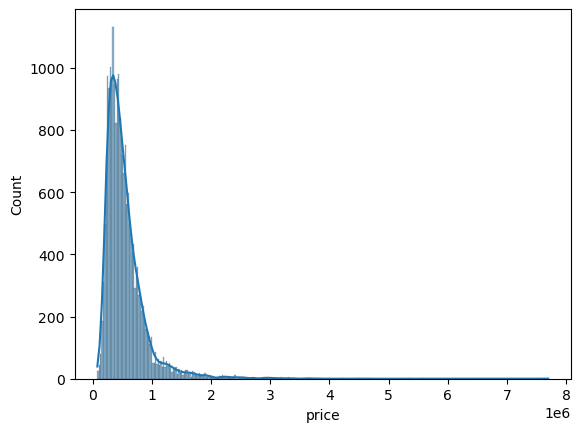

In [61]:
sns.histplot(data["price"],kde=True)

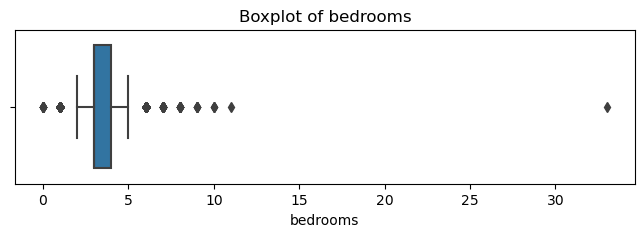

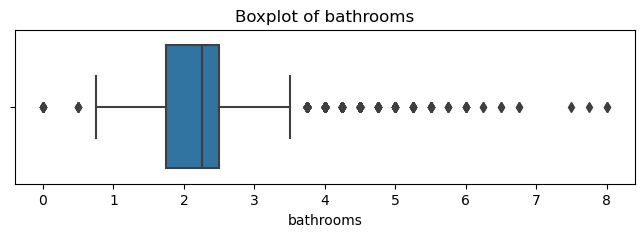

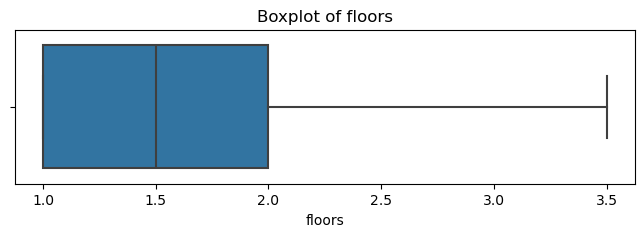

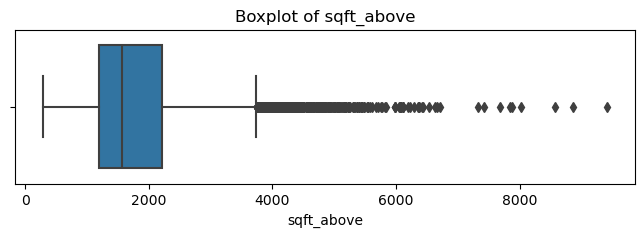

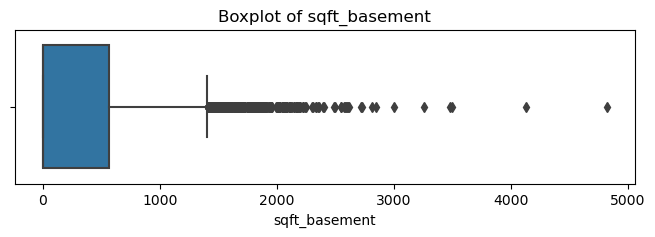

In [62]:
for col in ['bedrooms', 'bathrooms', 'floors', 'sqft_above', 'sqft_basement']:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
sns.histplot(np.log(data["price"]),kde=True)

In [31]:
data.drop(['sqft_living','sqft_lot','view','waterfront','zipcode','sqft_living15','sqft_lot15','long','lat','grade'],
          inplace=True , axis =  1 
         )

In [33]:
data.drop(['id','date'],inplace=True , axis =  1 )

In [36]:
data.head()

,price,bedrooms,bathrooms,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1.0,Average,1180,0,1955,0
1,538000.0,3,2.25,2.0,Average,2170,400,1951,1991
2,180000.0,2,1.00,1.0,Average,770,0,1933,0
3,604000.0,4,3.00,1.0,Very Good,1050,910,1965,0
4,510000.0,3,2.00,1.0,Average,1680,0,1987,0


In [40]:
cond = pd.get_dummies(data["condition"])
cond = cond.astype(int)
cond.head()

,Average,Fair,Good,Poor,Very Good
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0


In [ ]:
data = data.join([cond])
data.drop(['condition'],inplace=True , axis = 1 )

In [48]:
data.head()

,price,bedrooms,bathrooms,floors,sqft_above,sqft_basement,yr_built,yr_renovated,Average,Fair,Good,Poor,Very Good
0,221900.0,3,1.00,1.0,1180,0,1955,0,1,0,0,0,0
1,538000.0,3,2.25,2.0,2170,400,1951,1991,1,0,0,0,0
2,180000.0,2,1.00,1.0,770,0,1933,0,1,0,0,0,0
3,604000.0,4,3.00,1.0,1050,910,1965,0,0,0,0,0,1
4,510000.0,3,2.00,1.0,1680,0,1987,0,1,0,0,0,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   floors         21613 non-null  float64
 4   sqft_above     21613 non-null  int64  
 5   sqft_basement  21613 non-null  int64  
 6   yr_built       21613 non-null  int64  
 7   yr_renovated   21613 non-null  int64  
 8   Average        21613 non-null  int64  
 9   Fair           21613 non-null  int64  
 10  Good           21613 non-null  int64  
 11  Poor           21613 non-null  int64  
 12  Very Good      21613 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 2.1 MB


In [52]:
x = data[['bedrooms','bathrooms','floors','sqft_above','sqft_basement','yr_built','yr_renovated','Average',
            'Fair','Good','Poor','Very Good'
        ]]
y = data["price"]

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error , r2_score

In [57]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train , y_train) 

y_predicted = model.predict(x_test)

In [59]:
mse = mean_squared_error(y_test , y_predicted)
r2 = r2_score(y_test , y_predicted)

In [60]:
print(mse,r2)

62539067710.796 0.5512117611703521
